In [1]:
import spacy
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
import time
from sklearn.metrics import accuracy_score
from pandas import DataFrame
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix


In [2]:
# Reading the train txt file
with open('./train.txt') as f:
    input_txt=[word for line in f for word in line.split()]
len(input_txt)

# Saving words and IOB tags in different list
words = []
IOB=[]
for i in range(0, len(input_txt),2):
    words.append(input_txt[i])
for j in range(1, len(input_txt),2):
    IOB.append(input_txt[j])
print('Total number of words in the corpus:', len(words))


Total number of words in the corpus: 62730


In [3]:
# Storing in DataFrame for EDA
df = DataFrame()
df['words'] = words
df['IOB_tags'] = IOB
df

,words,IOB_tags
0,@paulwalk,O
1,It,O
2,'s,O
3,the,O
4,view,O
...,...,...
62725,39,O
62726,GMT+0000,O
62727,(,O
62728,UTC,O


In [4]:
# using describe method
df.describe()

,words,IOB_tags
count,62730,62730
unique,14878,13
top,.,O
freq,1936,59570


In [5]:
df['IOB_tags'].value_counts()

O                  59570
B-person             660
B-location           548
I-person             335
B-group              264
I-location           245
B-corporation        221
I-creative-work      206
I-product            203
I-group              150
B-product            142
B-creative-work      140
I-corporation         46
Name: IOB_tags, dtype: int64

#### So, the dataset is not balanced, we can see that they are 13 classes with  'O' being the most prominent.

In [6]:
# transform words to vector by spacy inbuilt library
# takes around 10 mins
NLP = spacy.load("en")

def get_word_vector(word):
    s = NLP(word)
    return s.vector

word_vector = []
for i in range(len(words)):
    word_vector.append(get_word_vector(words[i]))

word_vect  = np.array(word_vector)
word_vect.shape

(62730, 96)

#### Using Spacy library to convert the words into feature vector.<br>

#### Each word is converted into (1,96) vector

<b>Comment:<br>
<b>Using Stratified k fold cross validation so that each split has equal percentage of classes.
Using Naive Bayes-Gaussian to train model

In [7]:
# Using Stratified k fold cross validation so that each split has equal percentage of classes.
# Using Naive Bayes-Gaussian to train model

skf = StratifiedKFold(n_splits=4, random_state=48, shuffle=True)
accuracy=[] # list contains the accuracy for each fold
n=1

features = word_vect
#y=df['IOB_tags_encoded']
y = df['IOB_tags']
for trn_idx, test_idx in skf.split(features, y):
    start_time = time.time()
    X_tr,X_val=features[trn_idx],features[test_idx]
    y_tr,y_val=y.iloc[trn_idx],y.iloc[test_idx]
    model = GaussianNB()

    #model=MultinomialNB(alpha=0.5)
    #model=svm.SVC(max_iter=1000)
    model.fit(X_tr,y_tr)
    y_pred = model.predict(X_val)

    accuracy.append(accuracy_score(y_val, y_pred))
    print('Time taken to run:',(time.time() - start_time)/60,'Validation Accuracy: ',accuracy[n-1])
    n+=1

Time taken to run: 0.005433603127797445 Validation Accuracy:  0.7779761525218389
Time taken to run: 0.005201005935668945 Validation Accuracy:  0.775808199961742
Time taken to run: 0.00521173079808553 Validation Accuracy:  0.7865705904859074
Time taken to run: 0.00504155158996582 Validation Accuracy:  0.7827445478892998


<b>So, we use Precision, Recall and F1 Score. We also print the Confusion Matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


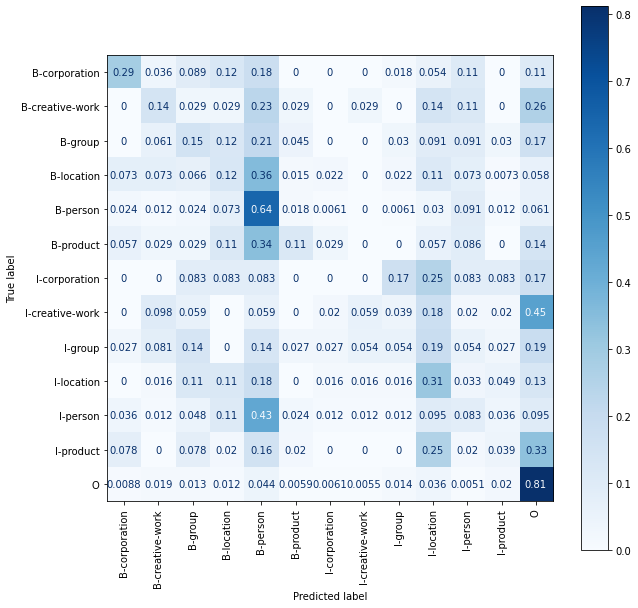

                 precision    recall  f1-score   support

  B-corporation       0.09      0.29      0.14        56
B-creative-work       0.02      0.14      0.03        35
        B-group       0.04      0.15      0.06        66
     B-location       0.07      0.12      0.09       137
       B-person       0.12      0.64      0.20       165
      B-product       0.04      0.11      0.06        35
  I-corporation       0.00      0.00      0.00        12
I-creative-work       0.03      0.06      0.04        51
        I-group       0.01      0.05      0.02        37
     I-location       0.03      0.31      0.06        61
       I-person       0.05      0.08      0.06        84
      I-product       0.01      0.04      0.01        51
              O       0.99      0.81      0.89     14892

       accuracy                           0.78     15682
      macro avg       0.11      0.22      0.13     15682
   weighted avg       0.94      0.78      0.85     15682



In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model,X_val,y_val,cmap=plt.cm.Blues,normalize='true',ax=ax,xticks_rotation='vertical')
plt.show()

# Classification report
print(classification_report(y_val, y_pred))


In [9]:
print('F1 score:',f1_score(y_val, y_pred, average='weighted'))

F1 score: 0.8517655058079655


#### The F1 score of the model is 85.17%

## Testing

In [10]:
# reading test file
with open('./test.txt') as f:
    test_txt=[word for line in f for word in line.split()]
len(test_txt)

test_words = []
for i in range(0, len(test_txt),1):
    test_words.append(test_txt[i])

print('Total number of words in the test corpus:', len(test_words))


Total number of words in the test corpus: 23394


In [11]:
# transforming words to vector
word_vector_test = []
for i in range(len(test_words)):
    word_vector_test.append(get_word_vector(test_words[i]))

word_vect_test  = np.array(word_vector_test)
word_vect_test.shape

(23394, 96)

In [12]:
# evaluate and predict
predicted_tag = model.predict(word_vect_test)
print(predicted_tag)

['O' 'O' 'O' ... 'I-location' 'O' 'O']


In [13]:
test_df = DataFrame()
test_df['words'] = test_words
# test_df['IOB_label Predicted'] = predicted_label
test_df['IOB_tag Predicted'] = predicted_tag
test_df

,words,IOB_tag Predicted
0,&,O
1,gt,O
2,;,O
3,*,O
4,The,B-creative-work
...,...,...
23389,with,O
23390,this,O
23391,dress,I-location
23392,code,O


In [14]:
test_df['IOB_tag Predicted'].value_counts()

O                  18982
B-person            1032
I-location           887
B-creative-work      360
B-location           323
B-group              321
I-product            320
I-group              257
I-corporation        223
I-person             221
B-corporation        199
I-creative-work      152
B-product            117
Name: IOB_tag Predicted, dtype: int64

In [15]:
# saving those predictions with the words
test_df.to_csv('output_spacy.csv',index=False)
# drop ID col and then save txt
#test_df.drop(labels='IOB_label Predicted', axis=1, inplace=True)
test_df.to_csv('output_spacy.txt', header=None, index=None, sep='\t', mode='a')